In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [2]:
# Reading of file
def ReadFile(file):
    f=open(file,"r")
    lines=f.read().splitlines()
    f.close()

    items=[]
    for i in range(len(lines)):
        line=lines[i].split(',')
        feature=[]
        for j in line:
            feature.append(float(j))

        items.append(feature)
        
    return items

In [3]:
def Figure(items):
    plt.figure(figsize=(20,10))
    for item in items:
        plt.scatter(item[0],item[1],c='b',s=70)
    plt.title('Before applying K Means')
    plt.show()

In [4]:
def FinalFigure(items,clusters):
    plt.figure(figsize=(20,10))
    for i in range(len(items)):
        colors=['k','b','y','g','r']
        plt.scatter(items[i][0],items[i][1],c=colors[clusters[i]-1],s=70)
    plt.title('After applying K Means')
    plt.show()

In [5]:
def MinkowskiDistance(obj1,obj2,p):
    sum=0
    for i in range(len(obj1)):
        sum+=math.pow(abs(obj1[i]-obj2[i]),p)   
    return math.pow(sum,(1/p))

In [6]:
def Distances(items,means,p):
    k=len(means)
    distances=[]
    for i in range(k):
        distance=[]
        for item in items:
            dist=MinkowskiDistance(item,means[i],p)
            distance.append(dist)
        distances.append(distance)
    return distances

In [7]:
def InitializeMeans(items, k):    
    no_f = len(items[0]); 
    means =[]
    while(len(means)!=k):
        mean=list(random.choice(items))
        if mean not in means:
            means.append(mean)
    return means

In [8]:
def CalculateMean(items,clusters,i,j):
    sum=0.0
    count=0
    z=len(items)
    for k in range(z):
        if(clusters[k]==j+1):
            sum+=items[k][i]
            count+=1
    if(count!=0):
        return(sum/float(count))
    else:
        return -1

In [9]:
def UpdateMean(items,clusters,means):
    a=len(means)
    b=len(means[0])
    for j in range(a):
        for i in range(b):
            num=CalculateMean(items,clusters,i,j)
            if(num!=-1):
                means[j][i]=num
    return means

In [10]:
def ClusterAssigning(clusters,distances):
    for j in range(len(clusters)):
        min=math.inf
        for i in range(len(distances)):
            if min>distances[i][j]:
                min=distances[i][j]
                clusters[j]=i+1
    return clusters

In [11]:
def KMeans(file,no_clus,num_of_iterations,p):
    items=ReadFile(file)
    Figure(items)
    clusters=[0 for i in range(len(items))]
    means=InitializeMeans(items,no_clus)
    while(num_of_iterations):
        distances=Distances(items,means,p)
        clusters=ClusterAssigning(clusters,distances)
        #print("---------------Means---------------------------")
        #print(means)
        means=UpdateMean(items,clusters,means)
        #print("---------------Clusters---------------------------")
        #print(clusters)
        #print()
        num_of_iterations-=1
    FinalFigure(items,clusters)
    print('Points\t\tCluster')
    print('----------------------')
    for i in range(len(items)):
        print(items[i],'\t',clusters[i])

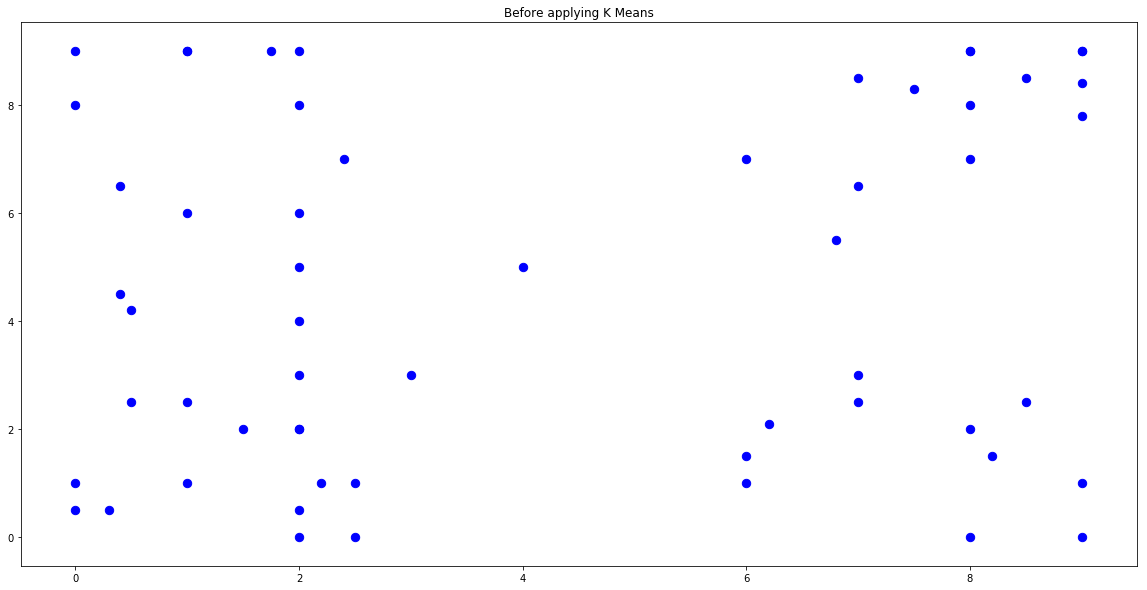

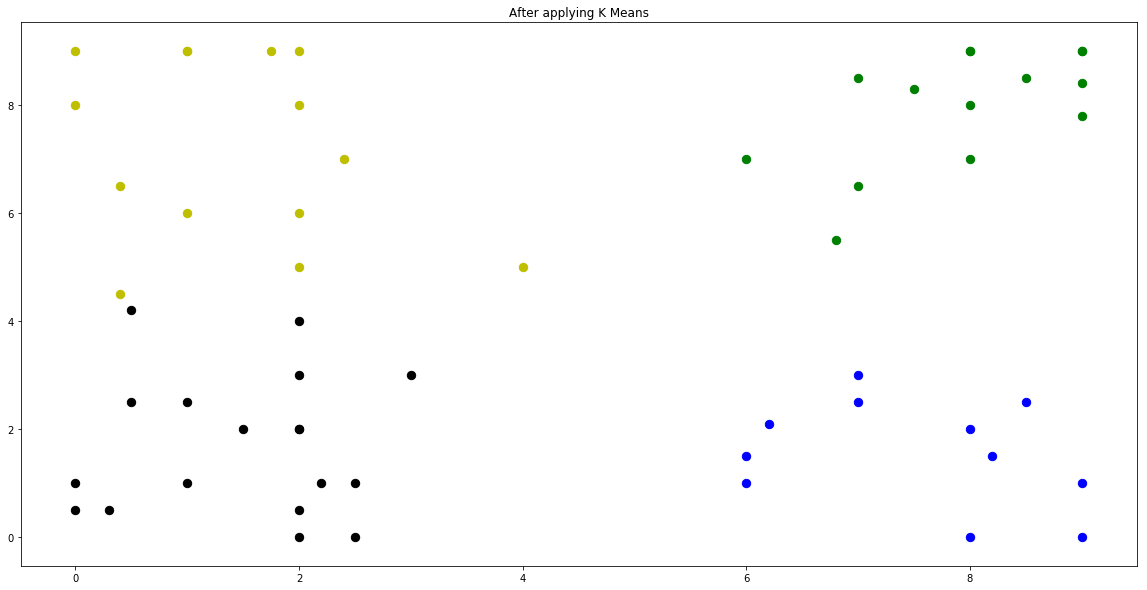

Points		Cluster
----------------------
[2.0, 3.0] 	 1
[4.0, 5.0] 	 3
[6.0, 7.0] 	 4
[8.0, 9.0] 	 4
[2.0, 2.0] 	 1
[9.0, 9.0] 	 4
[9.0, 1.0] 	 2
[1.0, 9.0] 	 3
[2.0, 9.0] 	 3
[8.0, 9.0] 	 4
[8.0, 2.0] 	 2
[1.0, 1.0] 	 1
[2.0, 2.0] 	 1
[3.0, 3.0] 	 1
[8.0, 8.0] 	 4
[9.0, 9.0] 	 4
[7.0, 3.0] 	 2
[2.0, 8.0] 	 3
[1.0, 9.0] 	 3
[0.0, 8.0] 	 3
[9.0, 0.0] 	 2
[0.0, 1.0] 	 1
[2.0, 0.0] 	 1
[2.0, 6.0] 	 3
[0.0, 9.0] 	 3
[2.0, 5.0] 	 3
[6.0, 1.0] 	 2
[8.0, 7.0] 	 4
[8.0, 0.0] 	 2
[1.0, 6.0] 	 3
[0.5, 2.5] 	 1
[0.0, 0.5] 	 1
[1.5, 2.0] 	 1
[2.5, 1.0] 	 1
[1.0, 2.5] 	 1
[2.0, 4.0] 	 1
[2.0, 0.5] 	 1
[2.5, 0.0] 	 1
[0.3, 0.5] 	 1
[2.2, 1.0] 	 1
[0.4, 4.5] 	 3
[0.4, 6.5] 	 3
[2.4, 7.0] 	 3
[1.75, 9.0] 	 3
[0.5, 4.2] 	 1
[7.0, 6.5] 	 4
[8.5, 8.5] 	 4
[9.0, 8.4] 	 4
[9.0, 7.8] 	 4
[6.8, 5.5] 	 4
[7.0, 8.5] 	 4
[7.5, 8.3] 	 4
[7.0, 2.5] 	 2
[6.0, 1.5] 	 2
[6.2, 2.1] 	 2
[8.5, 2.5] 	 2
[8.2, 1.5] 	 2


In [12]:
# Parameters : ( File_Name, No_of_Clusters, No_of_Iterations,Value_of_P )
KMeans('sample.txt',4,10,3)